<a href="https://colab.research.google.com/github/MattWroclaw/AlgSort/blob/master/01_intro/01_pierwszy_model_sieci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

### Klasyfikator wieloklasowy - Digit Recognition

### Spis treści
1. [Pierwszy model sieci - problem klasyfikacji (Hello World w sieciach neuonowych)](#a1)
    1. [Import bibliotek](#a2)
    2. [Załadowanie i przygotowanie danych](#a3)
    3. [Eksploracja danych](#a4)
    4. [Budowa sieci neuronowej](#a5)    
    5. [Trenowanie modelu](#a6)
    6. [Ocena modelu](#a7)
    7. [Predykcja na podstawie modelu](#a8)

### <a name='a1'></a>1. Pierwszy model sieci - problem klasyfikacji (Hello World w sieciach neuonowych)

>Celem tego notebook'a jest wstępne zapoznanie się z interfejsem Google Colab oraz budową prostych sieci neuronowych w problemach klasyfikacji. W tym przypadku wykorzystamy dość popularny zbiór danych MNIST. Jest to zbiór, o którym powinna usłyszeć każda osoba zajmująca się sieciami neuronowymi. Jest swego rodzaju benchmarkiem do budowania sieci.

> Zbiór MNIST składa się z 70000 ręcznie zapisanych cyfr o rozdzielczosci 28x28. Zbiór przedstawia cyfry od 0 do 9 i jest podzielony na zbiór treningowy (60000 obrazów) oraz zbiór testowy (10000 obrazów).

#### <a name='a2'></a> 1.1 Import bibliotek

In [ ]:
# Przygotowanie środowiska do pracy z Tensorflow 2.0.
# Jeśli otrzymasz błąd podczas instalacji Tensorflow uruchom tę komórkę raz jeszcze.

!pip uninstall -y tensorflow
!pip install -q tensorflow==2.0.0

Nie trzebra tego robić, co powyżej.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

np.set_printoptions(precision=12, suppress=True, linewidth=120)
print(tf.__version__)

2.17.0


### <a name='a3'></a> 1.2 Załadowanie i przygotowanie danych

In [4]:
(X_train, y_train), (X_test, y_test) = load_data()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [5]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [6]:
print(f'X_train[0] shape: {X_train[0].shape}')

X_train[0] shape: (28, 28)


Standaryzacja danych. Każdą próbkę dzielimy przez największą wartość, czyli 255. Teraza wartości będą 0..1.  
Oczywiście nie bierzemey labeli do tego :)

In [7]:
X_train = X_train / 255.
X_test = X_test / 255.

### <a name='a4'></a> 1.3 Eksploracja danych

plt.imshow(): To jest funkcja z biblioteki Matplotlib, która służy do wyświetlania obrazów.
X_train[0]: To jest element, który ma zostać wyświetlony. Jest to pierwszy obraz z zestawu danych treningowych X_train. Zakładamy, że ten element zawiera dane obrazu w odpowiednim formacie (np. jako tablica NumPy).
cmap='gray_r': Ten argument określa mapę kolorów, która ma być użyta do wyświetlenia obrazu. gray_r oznacza odwróconą skalę szarości (odwróconą, ponieważ _r jest dodane na końcu). W tej mapie kolorów, 0 jest białe, a 255 jest czarne.

(-0.5, 27.5, 27.5, -0.5)

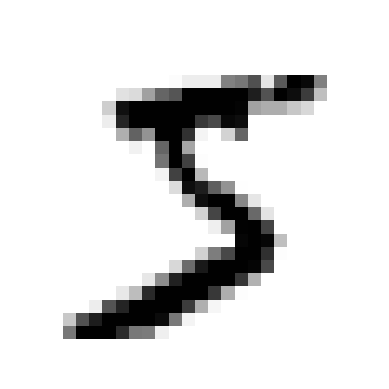

In [8]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

Oto szczegółowe wyjaśnienie krok po kroku:

plt.figure(figsize=(13, 13)): Tworzy nową figurę (okno) o rozmiarze 13x13 cali, gdzie będą wyświetlane obrazy.
for i in range(1, 11):: Pętla, która iteruje od 1 do 10 (włącznie), tworząc w ten sposób 10 podwykresów.
plt.subplot(1, 10, i): Tworzy podwykres w obrębie figury. Argumenty oznaczają: 1 wiersz, 10 kolumn, a i to indeks bieżącego podwykresu (od 1 do 10).
plt.axis('off'): Wyłącza osie (linie i etykiety osi) dla bieżącego podwykresu.
plt.imshow(X_train[i-1], cmap='gray_r'): Wyświetla obraz. X_train[i-1] pobiera obraz z zestawu danych (indeksujemy od 0, dlatego i-1), a cmap='gray_r' ustawia odwróconą skalę szarości (białe = 0, czarne = 255).
plt.title(y_train[i-1], color='black', fontsize=16): Dodaje tytuł do podwykresu. Tytułem jest etykieta (y_train[i-1]) odpowiadająca wyświetlanemu obrazowi. Tytuł jest czarny i ma rozmiar czcionki 16.
plt.show(): Wyświetla figurę z wszystkimi podwykresami (obrazami i etykietami).

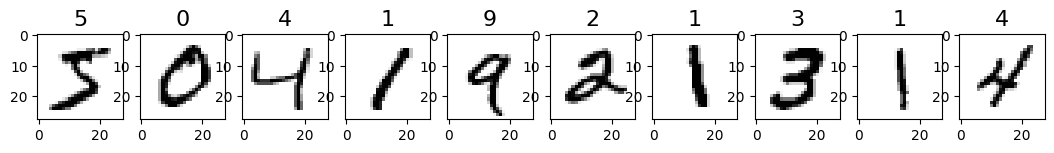

In [24]:
plt.figure(figsize=(13, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('on')
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.title(y_train[i-1], color='black', fontsize=16)
plt.show()

### <a name='a5'></a> 1.4 Budowa sieci neuronowej

In [11]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax')) # mamy 10 klas, więc musi być 10 neuronów

#The keyword argument 'optimizers' has been corrected to 'optimizer'
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

### <a name='a6'></a> 1.5 Trenowanie modelu

In [12]:
history = model.fit(X_train, y_train, epochs=5) # epochs mówi ile razy zbiór przejdize przez sieć

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8603 - loss: 0.4862
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9580 - loss: 0.1460
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9695 - loss: 0.1067
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9749 - loss: 0.0841
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9779 - loss: 0.0709


### <a name='a7'></a> 1.6 Ocena modelu  
Teraz bierzemy dane testowe, a nie treningowe.

In [13]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9778 - loss: 0.0727


[0.07270535826683044, 0.9778000116348267]

In [14]:
metrics = pd.DataFrame(history.history)
metrics

,accuracy,loss
0,0.914067,0.299635
1,0.958667,0.141586
2,0.968317,0.107529
3,0.973883,0.087986
4,0.977450,0.073123


In [15]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(width=800)

### <a name='a8'></a> 1.7 Predykcja na podstawie modelu

Predict: dostaniemy tablicę numpy array, która przedstawi prawdopodobieństwo przynależności do danej klasy.

In [16]:
model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.000000166531, 0.000000001442, 0.000028281429, ..., 0.9998002     , 0.000000226621, 0.000007785727],
       [0.00000178502 , 0.00003473954 , 0.99995464    , ..., 0.            , 0.000000193571, 0.000000000063],
       [0.000001566711, 0.9986232     , 0.0005570616  , ..., 0.00032361035 , 0.00030139877 , 0.000006266874],
       ...,
       [0.000000000022, 0.000000000001, 0.000000000094, ..., 0.000000603803, 0.000000898914, 0.000013192172],
       [0.000000011608, 0.000000013101, 0.0000000005  , ..., 0.000000005348, 0.0005249185  , 0.000000000284],
       [0.000000031174, 0.000000000012, 0.000000028645, ..., 0.            , 0.00000000053 , 0.000000007106]],
      dtype=float32)

In [27]:
# y_pred = model.predict_function(X_test)
# y_pred

import numpy as np # import numpy

y_pred = model.predict(X_test)
predicted_classes = np.argmax(y_pred, axis=1) # use np.argmax to get class with highest probability
print(predicted_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[7 2 1 ... 4 5 6]


pd.DataFrame(y_test, columns=['y_test']): Tworzy ramkę danych Pandas z y_test. Etykieta kolumny to "y_test".

pd.DataFrame(y_pred, columns=['y_pred']): Tworzy ramkę danych Pandas z y_pred. Etykieta kolumny to "y_pred".

pd.concat([..., ...], axis=1): Łączy dwie ramki danych wzdłuż kolumn (axis=1). To tworzy nową ramkę danych z dwiema kolumnami: "y_test" i "y_pred".

pred.head(10): Wyświetla pierwsze 10 wierszy ramki danych pred.

In [35]:
pred = pd.concat([pd.DataFrame(y_test, columns=['y_test']), pd.DataFrame(predicted_classes, columns=['y_pred'])], axis=1)
pred.head(10)

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [36]:
misclassified = pred[pred['y_test'] != pred['y_pred']]
misclassified.index[:10]

Index([217, 247, 259, 290, 321, 340, 381, 445, 447, 582], dtype='int64')

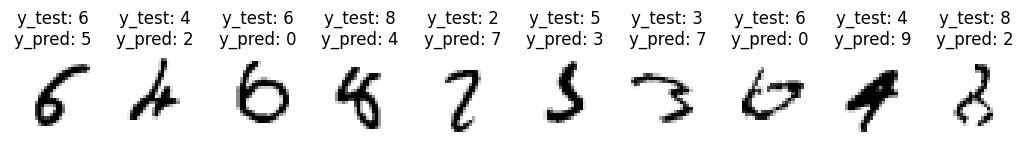

In [38]:
plt.figure(figsize=(13, 13))
for i, j in zip(range(1, 11), misclassified.index[:10]):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_test[j], cmap='gray_r')
    plt.title('y_test: ' + str(y_test[j]) + '\n' + 'y_pred: ' + str(predicted_classes[j]), color='black', fontsize=12)
plt.show()